In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics

#!pip install pandas==0.19.2

In [3]:
# Load your dataset, replace 'your_dataset.csv' with your actual dataset file
df = pd.read_csv('L0001.csv')

X = df[['x', 'y']]  # Features (x, y)
y = df['MPArea']      # Target values

df.head()

,x,y,P,T,stepIndex,XVector,YVector,MPArea,ImageSize,SKImage-eqDiameter,...,HoughTransform-b,HoughTransform-angle,HoughTransform-fitness,boundary,distanceToBoundary,velocity,XUnitVector,YUnitVector,invVelocity,powerDensity
0,-6.00,16.0,100.0,2.0,7750,0.009,0.0,0,0,0.000000,...,NaN,NaN,NaN,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
1,-5.91,16.0,100.0,2.0,7760,0.009,0.0,127,14400,12.716187,...,6.324555,2.574863,41.231056,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
2,-5.82,16.0,100.0,2.0,7770,0.009,0.0,174,14400,14.884343,...,6.000000,1.570796,48.000000,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
3,-5.73,16.0,100.0,2.0,7780,0.009,0.0,195,14400,15.756958,...,6.324555,2.976444,57.706152,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111
4,-5.64,16.0,100.0,2.0,7790,0.009,0.0,201,14400,15.997536,...,6.000000,1.570796,60.000000,1.0,0.0,0.009,1.0,NaN,111.111111,11111.111111


In [4]:
# Define the number of clusters (you can adjust this based on your dataset)
num_clusters = 4 #- # of clusters
kmeans = KMeans(n_clusters = num_clusters, random_state=42) 
kmeans.fit(X) #fitting the data

KMeans(n_clusters=4, random_state=42)

In [5]:
centroids = kmeans.cluster_centers_ #calculating centroids
predicted_clusters = kmeans.labels_ #cluster colors and seperations

[[  2.81693587 308.93278464]
 [  7.19274756 461.47175732]
 [  4.33746757 136.6108291 ]
 [  3.98353476 383.10809243]]


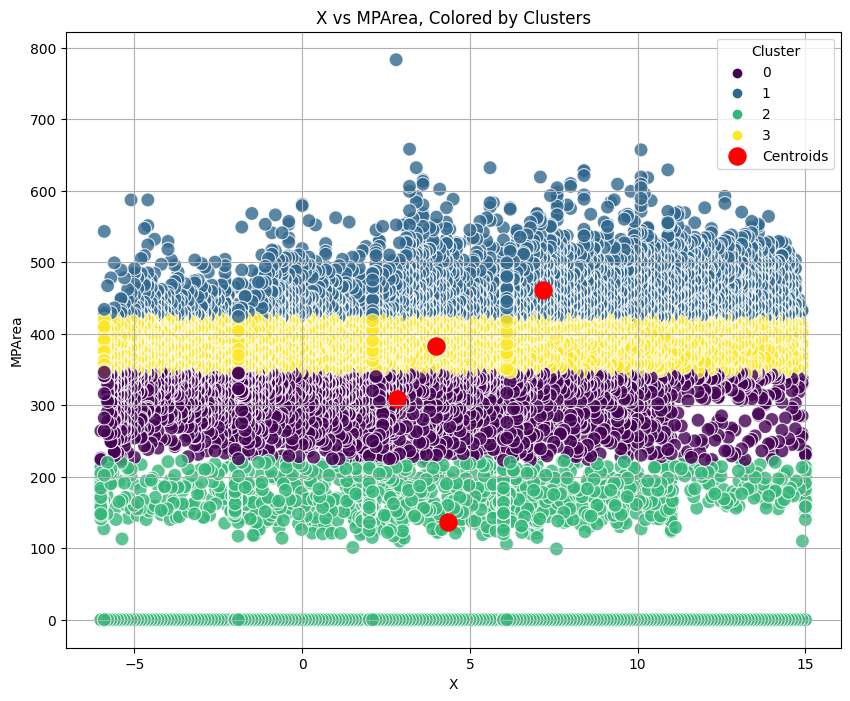

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

X1 = df[['x', 'MPArea']]

num_clusters = 4
kmeans1 = KMeans(n_clusters = num_clusters, init = 'k-means++', random_state=12, max_iter=300)
kmeans1.fit(X1)

centroids1 = kmeans1.cluster_centers_
predicted_clusters1 = kmeans1.labels_ #redo all centroid values for the new graph
print(centroids1)


# Scatter plot of 'MPArea' vs 'x', color-coded by clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='MPArea', hue=predicted_clusters1, data=df, palette='viridis', s=100, alpha=0.8) #scatter plot
#s=dot size, alpha=opacity, data=dataframe to be input
#plt.scatter(x=df['x'], y=df['MPArea'], c=predicted_clusters, cmap='viridis', s=50, alpha=0.5, label='Data Points')
plt.xlabel('X')
plt.ylabel('MPArea')
plt.scatter(centroids1[:, 0], centroids1[:, 1], marker='o', color='red', s=150, label='Centroids') #plot centroids
plt.xlabel('X')
plt.title('X vs MPArea, Colored by Clusters') #title 
plt.grid(True) #grid == true
plt.legend(title='Cluster')
plt.show()

In [7]:
for i, centroid in enumerate(centroids1):
    x_coord = centroid[0]
    y_coord = centroid[1]
    print(f"Centroid {i+1}: x = {x_coord}, y = {y_coord}")

first_centroid = centroids1[0] #x centroid
x_coord = first_centroid[0]
y_coord = first_centroid[1]
print(f"Coordinates of the X centroid: x = {x_coord}, y = {y_coord}")

Centroid 1: x = 2.816935871056245, y = 308.93278463648795
Centroid 2: x = 7.192747559274759, y = 461.471757322176
Centroid 3: x = 4.3374675690919355, y = 136.61082910321437
Centroid 4: x = 3.983534757807213, y = 383.10809242966286
Coordinates of the X centroid: x = 2.816935871056245, y = 308.93278463648795


In [8]:
df['Cluster'] = pd.Series(kmeans1.labels_)

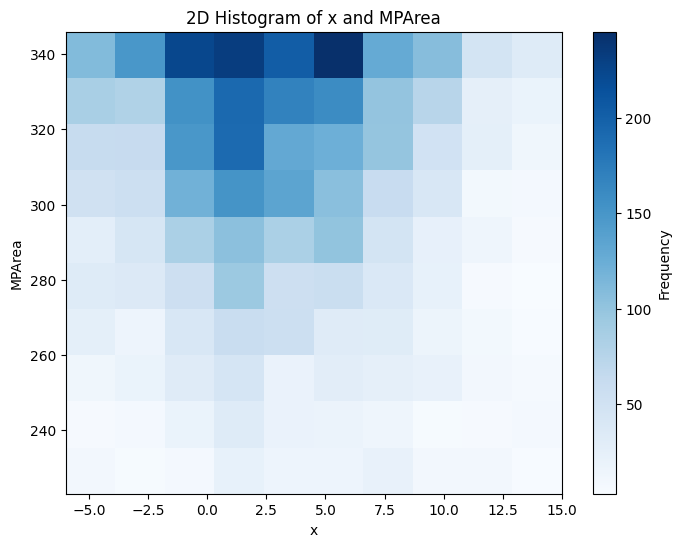

In [11]:
ndf = df

ndf = ndf[ndf['Cluster'] == 0] #CLUSTER NUMBER ___

# Plot histogram
plt.figure(figsize=(8, 6))

plt.hist2d(ndf['x'], ndf['MPArea'], bins=10, cmap='Blues')
plt.colorbar(label='Frequency')

#plt.ylim(0,800)
#plt.xlim(-5,15)
plt.xlabel('x')
plt.ylabel('MPArea')
plt.title('2D Histogram of x and MPArea')

plt.show()

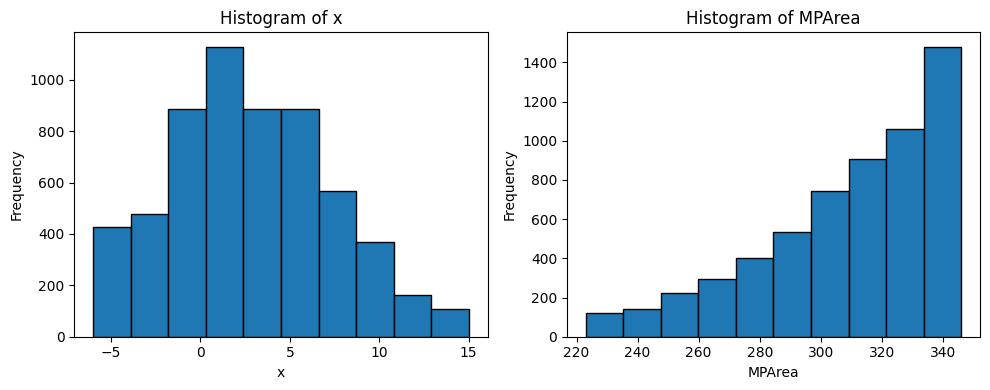

In [12]:
plt.figure(figsize=(10, 4))

# Histogram for x
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.hist(ndf['x'], bins=10, edgecolor='black')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of x')

# Histogram for MPArea
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.hist(ndf['MPArea'], bins=10, edgecolor='black')
plt.xlabel('MPArea')
plt.ylabel('Frequency')
plt.title('Histogram of MPArea')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()